In [104]:
# importation des libraries

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# lecture des données et mise en forme

df = pd.read_csv('BTC-USD.csv', encoding='utf-8',index_col='Date',parse_dates=True)

df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Evolution du prix du BTC sur le temps

<AxesSubplot:xlabel='Date'>

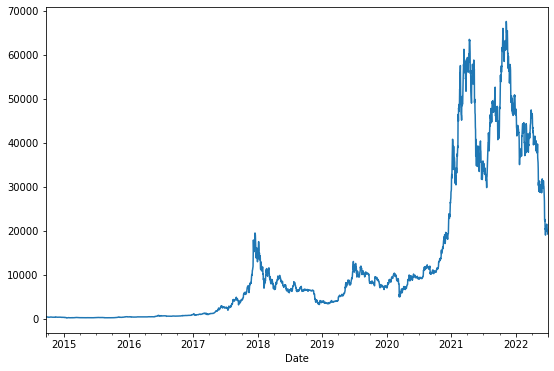

In [105]:
df['Close'].plot(figsize=(9,6))

Corrélation entre les valeurs

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999528,0.999112,0.998811,0.998811,0.724008
High,0.999528,1.000000,0.999043,0.999476,0.999476,0.727865
Low,0.999112,0.999043,1.000000,0.999389,0.999389,0.715739
Close,0.998811,0.999476,0.999389,1.000000,1.000000,0.722695
Adj Close,0.998811,0.999476,0.999389,1.000000,1.000000,0.722695
Volume,0.724008,0.727865,0.715739,0.722695,0.722695,1.000000


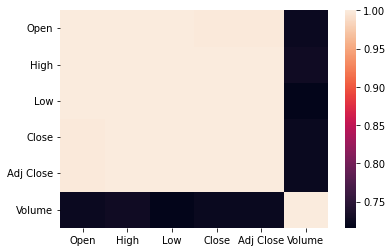

In [106]:
sns.heatmap(df.corr()) 
df.corr()

In [107]:
#  definition des colonnes features et target 

close = df['Close']
volume = df['Volume']

features = volume
target = close
 
df = df[['Close','Volume']]
df.head()

,Close,Volume
Date,,
2014-09-17,457.334015,21056800
2014-09-18,424.440002,34483200
2014-09-19,394.795990,37919700
2014-09-20,408.903992,36863600
2014-09-21,398.821014,26580100


In [108]:
# regression linéaire simple 
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

x=features.values.reshape(-1,1)
y=target
modele = linear_model.LinearRegression()
modele.fit(x,y)

print(modele.score(x,y) *100)
print("coeff 0 = ", modele.intercept_)
print("coeff 1 = ", modele.coef_)

52.228765305150205
coeff 0 =  3152.102562986869
coeff 1 =  [6.01590305e-07]


Source et collecte des données : https://finance.yahoo.com/quote/BTC-USD/history/

Prix journalier du BTC du 17/09/2014 au 01/07/2022 ,4367 elements

Nous souhaitons prédire le prix du btc, notre target sera donc le dernier prix connu journalier (prix a la fermeture de la séance), il s'agit donc d'une variable quantitative continue


AttributeError: 'list' object has no attribute 'plot'

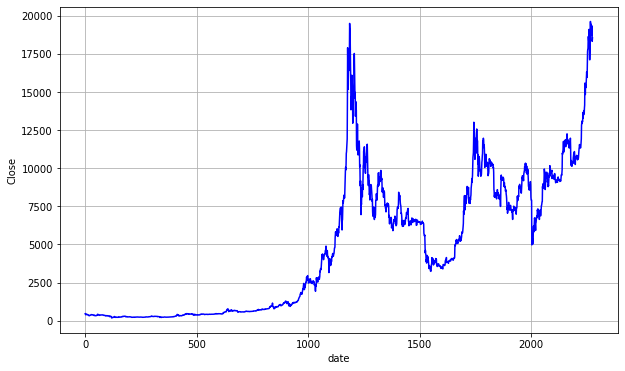

In [112]:
# Train test Split 

to_row = int(len(df)*0.8)

target_train_data = list(close[0:to_row] )
target_test_data = list(close[to_row:] )

plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel('date')
plt.ylabel('Close')
plt.plot(target_train_data,'blue',label='train')
plt.plot(target_test_data,"red",label='test')

plt.legend()





In [ ]:
predictions = []
n_test_obser = len(target_test_data)


model = ARIMA(target_train_data, order = (4,1,0)).fit()
output = model.forecast()

print(model)
    
    

